###  MicroGrad demo

In [1]:
import random
import numpy as np
from sklearn.datasets import make_moons, make_blobs

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import MLP

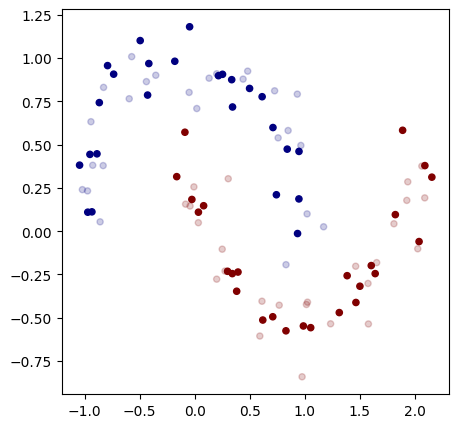

In [3]:
np.random.seed(2)
random.seed(2)

# make up a dataset
X_val, y_val = make_moons(n_samples=50, noise=0.1)
y_val = y_val*2 - 1 # make y be -1 or 1

X, y = make_moons(n_samples=50, noise=0.1)
y = y*2 - 1 # make y be -1 or 1



# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.scatter(X_val[:,0], X_val[:,1], c=y_val, s=20, cmap='jet', alpha=0.2)

In [4]:
def print_x(X):
    print(":~  "+"\n    ".join("~[" + " ".join(".~" + str(xx) for xx in x) + "]" for x in X) + "\n==")

def print_y(y):
    print(":~  "+"\n    ".join(".~"+str(yy) for yy in y) + "\n==")

In [5]:
print_x(X)

print_y(y)

:~  ~[.~1.606548108086409 .~-0.19861287493127355]
    ~[.~-0.4947482475221469 .~1.1003181584089208]
    ~[.~-0.9339511018934178 .~0.11156346742691137]
    ~[.~0.3945225345195033 .~-0.2359220641700401]
    ~[.~0.614075191205101 .~0.776292173140289]
    ~[.~0.3429395369000665 .~-0.24504810879297242]
    ~[.~1.6422242614567473 .~-0.24504450947962517]
    ~[.~-0.8878959373156354 .~0.44653492084922497]
    ~[.~0.0820800133364609 .~0.1468843233699894]
    ~[.~0.8423898936969823 .~0.47363248636145666]
    ~[.~0.989204901718078 .~-0.5473461766668748]
    ~[.~0.49990085404233475 .~0.8240469038732791]
    ~[.~0.7107741942361889 .~-0.49410251849066494]
    ~[.~0.38258158178293433 .~-0.3467582336931977]
    ~[.~-1.0460235123746064 .~0.3812301591852637]
    ~[.~2.0942148064571837 .~0.3785387765418395]
    ~[.~-0.42748309967409975 .~0.7857877308489627]
    ~[.~0.25391444582550404 .~0.9056486289656493]
    ~[.~0.21688942538186964 .~0.8976729509824117]
    ~[.~0.34495478955882974 .~0.7169826132175211]

In [6]:
print_x(X_val)

print_y(y_val)

:~  ~[.~0.9774801645765868 .~-0.8406262908843175]
    ~[.~2.0929306738908475 .~0.1922594655232861]
    ~[.~-0.041478488804055386 .~0.14517670648350328]
    ~[.~0.4826219578766875 .~0.9238816777230495]
    ~[.~-0.049895384738241136 .~0.8012447719477833]
    ~[.~0.8311282377903513 .~-0.19343733477608077]
    ~[.~1.8128682455196217 .~0.04282266226680259]
    ~[.~1.9297734176728623 .~0.17781002788323116]
    ~[.~1.2367964870535793 .~-0.5347834067669726]
    ~[.~-1.0206340778922465 .~0.23979326109936097]
    ~[.~-0.85952679944456 .~0.05398016473433371]
    ~[.~1.938616626634409 .~0.28504773471252154]
    ~[.~-0.827977747569135 .~0.8301507272122078]
    ~[.~0.019915185596359967 .~0.708050152828684]
    ~[.~-0.08185093973084093 .~0.1560382035258669]
    ~[.~0.6127214456916381 .~-0.40442686968279007]
    ~[.~-0.5722558354766104 .~1.0076467022335185]
    ~[.~1.0229399529534677 .~0.09980454392849986]
    ~[.~-0.006352437910997065 .~0.25582661999066725]
    ~[.~-0.4384109881128897 .~0.86344865305

In [7]:
np.random.seed(0)
random.seed(0)

In [8]:
# initialize a model 
model = MLP(2, [8, 4, 1]) # 2-layer neural network

print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8)], Layer of [LinearNeuron(4)]]
number of parameters 65


In [9]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    alpha = 1e-6
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=2.0276672855648967, grad=0) 0.5


In [10]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
#    learning_rate = 1.0 - 0.5*k/100
    learning_rate = 1.0 - k/100

    grads = []
    for p in model.parameters():
        p.data -= learning_rate * p.grad
        grads.append(p.grad)
    
    #print("")
    #print(grads)
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")


step 0 loss 2.0276672855648967, accuracy 50.0%
step 1 loss 0.9617965575624355, accuracy 50.0%
step 2 loss 0.827531403457403, accuracy 50.0%
step 3 loss 0.712153520213025, accuracy 57.99999999999999%
step 4 loss 0.44614262911593977, accuracy 82.0%
step 5 loss 0.3647820093279739, accuracy 84.0%
step 6 loss 0.3318840284022249, accuracy 84.0%
step 7 loss 0.37307855007445323, accuracy 86.0%
step 8 loss 0.4568128169918923, accuracy 84.0%
step 9 loss 0.44088464875341093, accuracy 84.0%
step 10 loss 0.3707639730201579, accuracy 84.0%
step 11 loss 0.29040213170481083, accuracy 86.0%
step 12 loss 0.2657807396393707, accuracy 88.0%
step 13 loss 0.24921695738144495, accuracy 88.0%
step 14 loss 0.24147959129480126, accuracy 90.0%
step 15 loss 0.25047156907419843, accuracy 90.0%
step 16 loss 0.30608237417776263, accuracy 86.0%
step 17 loss 0.4483429975338037, accuracy 86.0%
step 18 loss 0.33701338668307296, accuracy 88.0%
step 19 loss 0.26376628075269276, accuracy 86.0%
step 20 loss 0.25885790657603

(-1.575269735438876, 2.174730264561124)

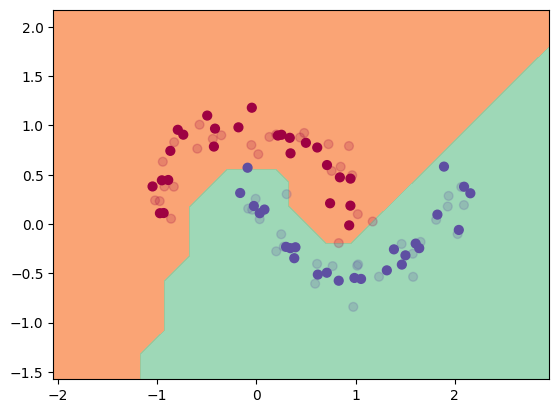

In [11]:

# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, s=40, cmap=plt.cm.Spectral, alpha=0.2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
